### <span style='color:blue '> Projet 4: Anticipez les besoins en consommation électrique de bâtiments </span>

- Lien vers les données : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

- Lien vers les significations des colonnes : : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

- Lien vers Energy Star score : https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set()
import os

In [2]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 1000)

#### <span style='color:blue'> Récupération des données</span>

In [3]:
data_2015 =pd.read_csv("2015-building-energy-benchmarking.csv")

In [4]:
data_2016 =pd.read_csv("2016-building-energy-benchmarking.csv")

#### <span style='color:blue'> Exploration initiale des données</span>

In [5]:
def shape(dataframe):
    "Calcule et affiche la forme de dataframe et le taux de remplissage"
    
    # Obtenir le nombre de lignes et de colonnes dans le dataframe
    nb_rows, nb_columns = dataframe.shape
    print("\nLe dataFrame a {} lignes et {} colonnes.".format(nb_rows,nb_columns))
    
    # Obtenir le nombre de données non-Nan dans le dataframe 
    nb_data = dataframe.describe(include='all').loc["count"].sum()

    # calcul du taux de remplissage en arrondissant à 2 décimales 
    import math
    filling_rate = math.floor(nb_data*10000 / (nb_rows * nb_columns))/10000
    print("Le taux de remplissage global du DataFrame est de : {:.2%}".format(filling_rate))
    
    # calcul des valeurs manquantes 
    nb_missing = int((nb_rows * nb_columns) - nb_data)
    print("Il y a {} valeurs manquantes sur {}.".format(nb_missing, int(nb_rows * nb_columns)))

In [6]:
shape(data_2015)
shape(data_2016)


Le dataFrame a 3340 lignes et 47 colonnes.
Le taux de remplissage global du DataFrame est de : 83.11%
Il y a 26512 valeurs manquantes sur 156980.

Le dataFrame a 3376 lignes et 46 colonnes.
Le taux de remplissage global du DataFrame est de : 87.15%
Il y a 19952 valeurs manquantes sur 155296.


In [7]:
data_2015.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081


In [8]:
data_2016.head(1)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.6122,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.5,189.0,7226362.5,7456910.0,2003882.0,1156514.25,3946027.0,12764.5293,1276453.0,False,NaN,Compliant,NaN,249.98,2.83


In [9]:
data_2015.describe(include=['O']).T

,count,unique,top,freq
BuildingType,3340,7,NonResidential,1461
PrimaryPropertyType,3340,27,Low-Rise Multifamily,998
PropertyName,3340,3287,WAREHOUSE,9
TaxParcelIdentificationNumber,3338,3245,3224049012,5
Location,3340,3298,"{'latitude': '47.66375728', 'longitude': '-122...",5
Neighborhood,3340,13,DOWNTOWN,578
ListOfAllPropertyUseTypes,3213,442,Multifamily Housing,862
LargestPropertyUseType,3204,56,Multifamily Housing,1598
SecondLargestPropertyUseType,1559,47,Parking,881
ThirdLargestPropertyUseType,560,41,Retail Store,107


In [10]:
data_2016.describe(include=['O']).T

,count,unique,top,freq
BuildingType,3376,8,NonResidential,1460
PrimaryPropertyType,3376,24,Low-Rise Multifamily,987
PropertyName,3376,3362,Northgate Plaza,3
Address,3376,3354,2600 SW Barton St,4
City,3376,1,Seattle,3376
State,3376,1,WA,3376
TaxParcelIdentificationNumber,3376,3268,1625049001,8
Neighborhood,3376,19,DOWNTOWN,573
ListOfAllPropertyUseTypes,3367,466,Multifamily Housing,866
LargestPropertyUseType,3356,56,Multifamily Housing,1667


On va regrouper les deux fichiers de 2015 et 2016. Pour cela, il faut vérifier si les deux bases de données sont homogènes.

#### <span style='color:blue'> Homogénéisation des fichiers</span>

#### Analyse des colonnes

L'agrégation des données de 2015 et de 2016 nécessitera de gérer les données dupliquées.

In [11]:
print("\nNom des {} colonnes communes :\n".format(len(set(data_2015)&set(data_2016))), set(data_2015)&set(data_2016))
print("\nNom des {} colonnes uniquement dans les données 2015 :\n".format(len(set(data_2015)-set(data_2016))), set(data_2015)-set(data_2016))
print("\nNom des {} colonnes uniquement dans les données 2016 :\n".format(len(set(data_2016)-set(data_2015))), set(data_2016)-set(data_2015))


Nom des 37 colonnes communes :
 {'SourceEUI(kBtu/sf)', 'Electricity(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'DefaultData', 'Electricity(kWh)', 'PropertyGFATotal', 'SecondLargestPropertyUseTypeGFA', 'LargestPropertyUseTypeGFA', 'PropertyName', 'ThirdLargestPropertyUseType', 'CouncilDistrictCode', 'PrimaryPropertyType', 'NaturalGas(kBtu)', 'ComplianceStatus', 'ENERGYSTARScore', 'LargestPropertyUseType', 'Neighborhood', 'OSEBuildingID', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ListOfAllPropertyUseTypes', 'TaxParcelIdentificationNumber', 'SteamUse(kBtu)', 'NaturalGas(therms)', 'DataYear', 'NumberofBuildings', 'NumberofFloors', 'YearBuilt', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'Outlier', 'SecondLargestPropertyUseType', 'SiteEnergyUseWN(kBtu)', 'BuildingType', 'SiteEnergyUse(kBtu)', 'SiteEUI(kBtu/sf)'}

Nom des 10 colonnes uniquement dans les données 2015 :
 {'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', 'City Council Districts', 'SPD Beats',

Nous constatons que certaines colonnes spécifiques ont en fait la même sémantique. Par exemple :

- La colonne 'Comment' de 2015 correspond à la colonne 'Comments' de 2016
- La colonne 'Zip Codes' de 2015 correspond à la colonne 'ZipCode' de 2016
- La colonne 'GHGEmissionsIntensity(kgCO2e/ft2)' de 2015 correspond à la colonne 'GHGEmissionsIntensity' de 2016
- La colonne 'GHGEmissions(MetricTonsCO2e)' de 2015 correspond à la colonne 'TotalGHGEmissions' de 2016

In [12]:
data_2015[['GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']].describe()

,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3330.000000,3330.000000
mean,110.094102,0.985339
std,409.450179,1.637172
min,0.000000,0.000000
25%,9.265000,0.080000
50%,32.740000,0.460000
75%,88.642500,1.180000
max,11824.890000,31.380000


In [13]:
data_2016[['TotalGHGEmissions','GHGEmissionsIntensity']].describe()

,TotalGHGEmissions,GHGEmissionsIntensity
count,3367.000000,3367.000000
mean,119.723971,1.175916
std,538.832227,1.821452
min,-0.800000,-0.020000
25%,9.495000,0.210000
50%,33.920000,0.610000
75%,93.940000,1.370000
max,16870.980000,34.090000


#### Renommer les colonnes avec la même sémantique

In [14]:
# Renommer les colonnes avec la même sémantique, pour adopter les noms de la base de données 2016 
data_2015 = data_2015.rename(columns={
    'GHGEmissions(MetricTonsCO2e)':"TotalGHGEmissions",
    'Comment':'Comments',
    'Zip Codes':'ZipCode',
    'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
})

#### Décompactage des données de localisation de 2015

Nous constatons aussi que certaines colonnes spécifiques ont été reformatées. Ainsi, la colonne 'Location' de 2015 a été séparée en plusieurs colonnes en 2016 :

- State
- City
- Address
- Longitude
- Latitude
- ZipCode

In [15]:
data_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

Nous allon d'abord suppprimer les colonnes 'State', 'City', 'Address', 'ZipCode' des données 2016

In [16]:
data_2016 = data_2016.drop(['State', 'City', 'Address','ZipCode'], axis=1)

Nous allons donc travailler cette variable pour extraire chacune des variables imbriquées :

In [17]:
x = data_2015['Location'].str.split(pat=", ", expand=True)

In [18]:
x[0].str.replace('[^\d\.]', '')

0       47.61219025
1       47.61310583
2       47.61334897
3       47.61421585
4        47.6137544
           ...     
3335    47.59950256
3336    47.65752471
3337    47.61649845
3338    47.68396954
3339    47.68396954
Name: 0, Length: 3340, dtype: object

In [19]:
x[1].str.replace('[^\d\.]', '')

0       122.33799744
1       122.33335756
2       122.33769944
3       122.33660889
4        122.3409238
            ...     
3335    122.32034302
3336     122.3160159
3337    122.33770787
3338     122.2874088
3339     122.2874088
Name: 1, Length: 3340, dtype: object

In [20]:
data_2015['Latitude'] = x[0].str.replace('[^\d\.]', '')
data_2015['Longitude'] = x[1].str.replace('[^\d\.\-]', '')

Nous avons décompacter cette variable en conservant uniquement les colonnes correspondant à celles de 2016, c'est à dire 'latitude, longitude'. Renommons les de la même façon.

Les variables des 2 datasets sont maintenant identiques, nous allons pouvoir les regrouper en un unique jeu de données :

### Concaténation

In [21]:
data = pd.concat([data_2015, data_2016], sort=False)
shape(data)


Le dataFrame a 6716 lignes et 49 colonnes.
Le taux de remplissage global du DataFrame est de : 78.70%
Il y a 70080 valeurs manquantes sur 329084.


#### <span style='color:blue'> Nettoyage des données</span>

#### - Suppression des lignes correspondant à des habitations

Il est précisié dans le projet que seuls les bâtiments non destinés à l'habitation seront étudiés. Nous allons donc supprimer les lignes correspondant à des habitations en nous basant sur la variable BuildingType

In [22]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [23]:
data = data[~data['BuildingType'].str.contains("Multifamily")]
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [24]:
data.shape

(3318, 49)

#### -Fusion des lignes correspondant à des bâtiments dupliqués

Nous identifions les bâtiments dupliqués sur la base de l'identifiant 'OSEBuildingID'.

Nous fusionnons ensuite les lignes et supprimons les doublons.

In [25]:
data['OSEBuildingID'].duplicated().sum()

1620

In [26]:
def duplicates_merging(dataframe, keys):
    "Cette fonction traite les lignes dupliquées dans le dataframe, en fonction d'un sous-ensemble des colonnes"

    # Vérifier s'il y a des lignes en double 
    duplicates_mask = dataframe.duplicated(subset=keys, keep=False)
    if True not in list(duplicates_mask.unique()):
        print("No duplicates.")
        return dataframe
    
    print("Nombre de lignes en double :", len(dataframe[duplicates_mask]))
    
    # Filtrage du dataframe pour conserver que les lignes dupliquées 
    duplicates_mask = dataframe.duplicated(subset=keys, keep=False)
    duplicates_df = dataframe[duplicates_mask]

    # Grouper par sous-ensemble des colonnes utilisées pour la clé, sort=False pour accélérer 
    gb = duplicates_df.groupby(keys, sort=False)
    
    # Initialisation du dataframe agrégé
    agg_df = pd.DataFrame()

    # Identification des colonnes numériques et non numériques 
    numeric_columns = list(dataframe.select_dtypes(include=[np.number]).columns.values)

    # définition de la fonction d'agrégation pour les colonnes non numériques 
    def agg_mode(x): m = pd.Series.mode(x); return m.values[0] if not m.empty else np.nan

    # Itérer sur les colonnes 
    for column in dataframe.columns:

        # Calculer la moyenne de chaque groupe pour les colonnes numériques 
        if column in numeric_columns:
            agg_col = gb[column].agg('mean')

        # Calculer le mode de chaque groupe pour les colonnes numériques 
        else:
            agg_col = gb[column].agg(agg_mode)
            
        # ajouter la colonne agrégée au dataframe agrégé 
        agg_df = pd.concat([agg_df, agg_col], axis=1, sort=True)

    # Suppression de tous les doublons 
    dataframe_cleaned = dataframe.drop_duplicates(subset=keys, keep=False)

    # Concaténer le dataframe sans doublons et les lignes agrégées pour les doublons 
    result = dataframe_cleaned.append(agg_df, ignore_index=True, sort=False)

    print("Shape après le traitement des doublons  :", result.shape)
    return result

In [27]:
dataframe = data
keys = ['OSEBuildingID']

data = duplicates_merging(dataframe, keys)
shape(data)

Nombre de lignes en double : 3240


C:\Users\sahel\anaconda3\lib\site-packages\pandas\core\algorithms.py:897: UserWarning: Unable to sort modes: '<' not supported between instances of 'bool' and 'str'
  warn(f"Unable to sort modes: {err}")
C:\Users\sahel\anaconda3\lib\site-packages\pandas\core\algorithms.py:897: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  warn(f"Unable to sort modes: {err}")
C:\Users\sahel\anaconda3\lib\site-packages\pandas\core\algorithms.py:897: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  warn(f"Unable to sort modes: {err}")


Shape après le traitement des doublons  : (1698, 49)

Le dataFrame a 1698 lignes et 49 colonnes.
Le taux de remplissage global du DataFrame est de : 83.96%
Il y a 13339 valeurs manquantes sur 83202.


#### -Suppression  des colonnes inutiles


In [28]:
data = data.drop(['DefaultData','Location',
              'PropertyName','City Council Districts',
              'ComplianceStatus',
              'YearsENERGYSTARCertified',
              'TaxParcelIdentificationNumber',
              'ListOfAllPropertyUseTypes',
              'SecondLargestPropertyUseType',
              'SecondLargestPropertyUseTypeGFA',
              'LargestPropertyUseTypeGFA',
              'ThirdLargestPropertyUseType',
              'ThirdLargestPropertyUseTypeGFA',
              'Neighborhood','CouncilDistrictCode','SPD Beats',
              'ZipCode', 'Seattle Police Department Micro Community Policing Plan Areas'
                 ], axis=1)

Nous supprimons les variables (colonnes) qui n'apportent aucun élément explicatif.

In [29]:
data.shape

(1698, 31)

#### Les colonnes avec les suffixes WN :
"Weather Normalized" - Ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne rentrera pas en compte. Donc, nous allons les supprimer. 

In [30]:
data = data.drop(['SourceEUIWN(kBtu/sf)',
              'SiteEUIWN(kBtu/sf)',
              'SiteEnergyUseWN(kBtu)'],
              axis=1)

#### Les variables redondantes

In [31]:
# Suppression des variables redondantes
data = data.drop('NaturalGas(therms)', axis=1)
data = data.drop('Electricity(kWh)', axis=1)

Cette variable est très peu renseignée

In [32]:
data.drop("Comments", axis=1, inplace=True)

On n'a pas assez d'information sur cette variable. On la supprime

In [33]:
data.drop('Outlier', axis=1, inplace=True)

#### - Les données sans valeurs renseignées pour les cibles

les variables cibles : 
- La consommation d'énergie du bâtiment (SiteEnergyUse(kBtu))
- Les émissions de CO2 (TotalGHGEmissions).

Certaines données n'ont pas de valeurs renseignées pour les cibles. Nous allons supprimer ces données inexploitables.

In [34]:
data = data[~((data['SiteEnergyUse(kBtu)'].isnull()) | (data['TotalGHGEmissions'].isnull()))]

In [35]:
data.shape

(1697, 24)

In [36]:
data.dtypes

OSEBuildingID               int64
DataYear                  float64
BuildingType               object
PrimaryPropertyType        object
YearBuilt                   int64
NumberofBuildings         float64
NumberofFloors            float64
PropertyGFATotal          float64
PropertyGFAParking        float64
PropertyGFABuilding(s)    float64
LargestPropertyUseType     object
ENERGYSTARScore           float64
SiteEUI(kBtu/sf)          float64
SourceEUI(kBtu/sf)        float64
SiteEnergyUse(kBtu)       float64
SteamUse(kBtu)            float64
Electricity(kBtu)         float64
NaturalGas(kBtu)          float64
OtherFuelUse(kBtu)        float64
TotalGHGEmissions         float64
GHGEmissionsIntensity     float64
2010 Census Tracts        float64
Latitude                   object
Longitude                  object
dtype: object

Conversion de 'Latitude' et 'Longitude' en float

In [37]:
data['Latitude'] = data['Latitude'].astype('float64')
data['Longitude'] = data['Longitude'].astype('float64')

In [38]:
data.describe()   

,OSEBuildingID,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,2010 Census Tracts,Latitude,Longitude
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03,1697.000000,1.697000e+03,1154.000000,1697.000000,1697.000000,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.643000e+03,1697.000000,1697.000000,88.000000,1697.000000,1697.000000
mean,16335.021803,2015.505598,1961.710077,1.148792,4.103712,1.183821e+05,13429.637596,1.049525e+05,64.951906,72.104331,176.282793,8.457072e+06,5.133132e+05,5.865634e+06,1.971806e+06,1.428036e+04,185.235053,1.501859,124.420455,47.616092,-122.332924
std,13813.723285,0.106390,32.859346,2.810985,6.518106,2.952745e+05,42950.127462,2.807659e+05,28.041709,73.490710,183.783580,3.010387e+07,5.351773e+06,2.069226e+07,9.400898e+06,2.792388e+05,745.538021,2.266608,5.684667,0.048088,0.024571
min,1.000000,2015.000000,1900.000000,0.500000,0.000000,1.128500e+04,-1.000000,-8.451000e+03,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.120000,0.000000,116.000000,47.499331,-122.411820
25%,584.000000,2015.500000,1930.000000,1.000000,1.000000,2.939200e+04,0.000000,2.832000e+04,46.500000,32.900000,77.250002,1.215360e+06,0.000000e+00,7.328030e+05,0.000000e+00,0.000000e+00,20.150000,0.275000,122.000000,47.585941,-122.343254
50%,21150.000000,2015.500000,1965.000000,1.000000,2.000000,4.925200e+04,0.000000,4.736800e+04,72.500000,51.700001,131.750000,2.555917e+06,0.000000e+00,1.649172e+06,4.974050e+05,0.000000e+00,50.215000,0.785000,123.000000,47.612400,-122.332890
75%,24602.000000,2015.500000,1989.000000,1.000000,4.000000,1.067720e+05,0.000000,9.494800e+04,88.000000,82.450000,206.549997,6.960904e+06,0.000000e+00,4.871044e+06,1.507822e+06,0.000000e+00,139.630000,1.765000,127.000000,47.649342,-122.321643
max,50226.000000,2016.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,834.400024,2620.000000,8.739237e+08,1.314066e+08,6.570744e+08,2.979090e+08,8.269669e+06,16870.980000,34.090000,135.000000,47.733811,-122.258795


### Nombre des NaN(%)

In [39]:
100*(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

OSEBuildingID              0.000000
GHGEmissionsIntensity      0.000000
TotalGHGEmissions          0.000000
NaturalGas(kBtu)           0.000000
Electricity(kBtu)          0.000000
SteamUse(kBtu)             0.000000
SiteEnergyUse(kBtu)        0.000000
SourceEUI(kBtu/sf)         0.000000
SiteEUI(kBtu/sf)           0.000000
Latitude                   0.000000
Longitude                  0.000000
PropertyGFABuilding(s)     0.000000
PropertyGFAParking         0.000000
PropertyGFATotal           0.000000
NumberofFloors             0.000000
NumberofBuildings          0.000000
YearBuilt                  0.000000
PrimaryPropertyType        0.000000
BuildingType               0.000000
DataYear                   0.000000
LargestPropertyUseType     0.707130
OtherFuelUse(kBtu)         3.182086
ENERGYSTARScore           31.997643
2010 Census Tracts        94.814378
dtype: float64

In [40]:
# Je supprimme cette variable avec plus 94 % valeurs manquantes
data = data.drop('2010 Census Tracts', axis=1)

In [41]:
# On va supprimer'DataYear' aussi
data = data.drop(columns=['DataYear'])

<AxesSubplot:>

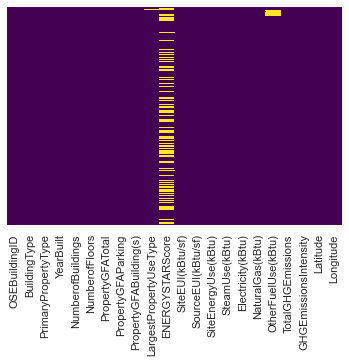

In [42]:
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')

- Nous allons faire une imputation par KNN sur "ENERGYSTARScore"

- Pour la variable "OtherFuelUse(kBtu)", nous allons remplacer les valeurs manquantes par la moyenne

- Nous allons supprimer les lignes contenant les valeurs manquantes pour la variable "LargestPropertyUseType"

#### <span style='color:blue'>Traitement des valeurs aberrantes</span>

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


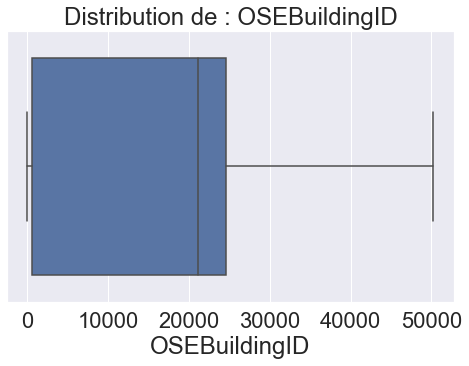

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


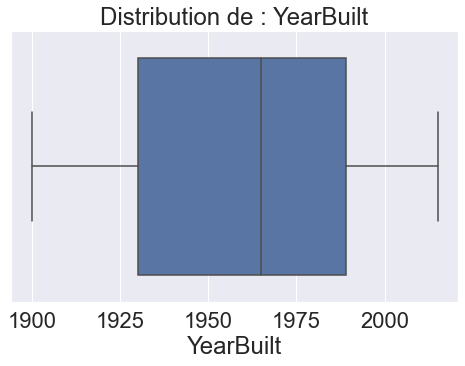

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


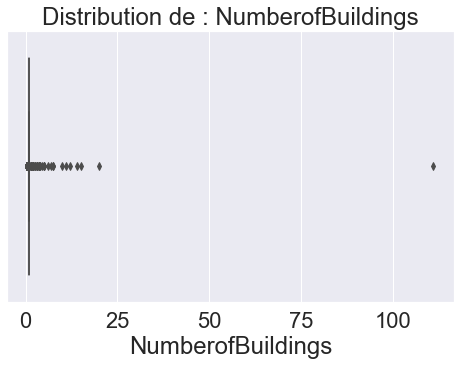

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


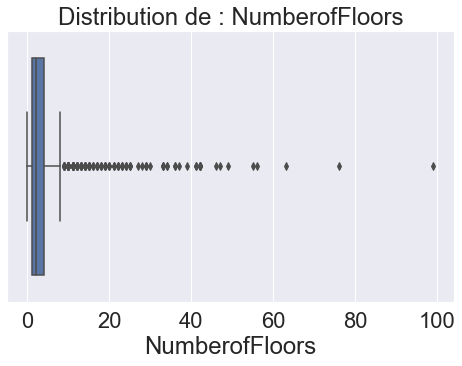

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


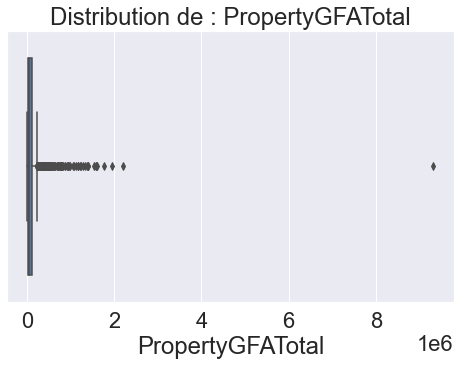

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


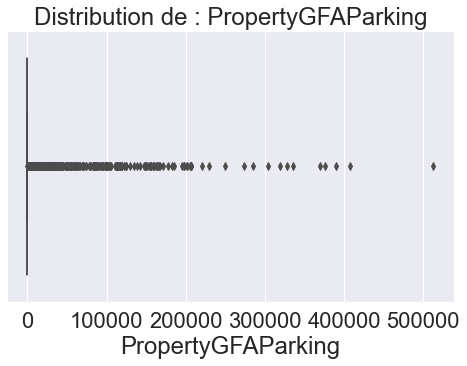

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


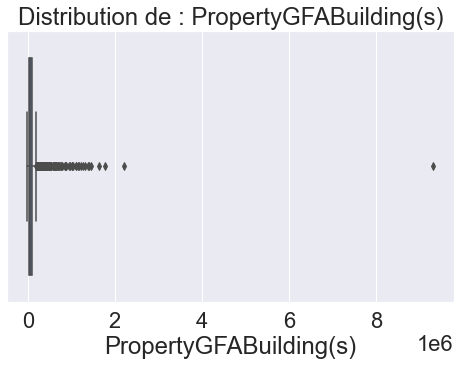

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


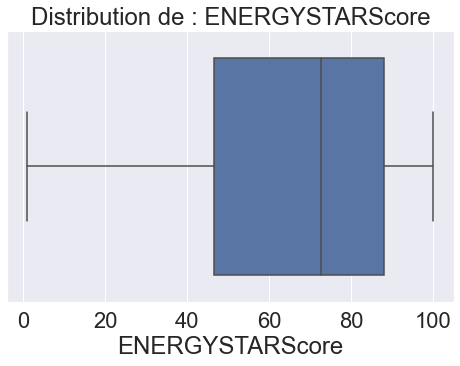

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


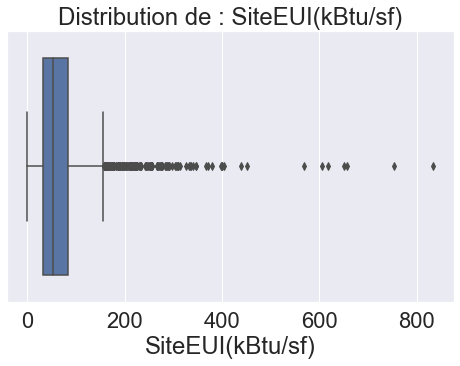

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


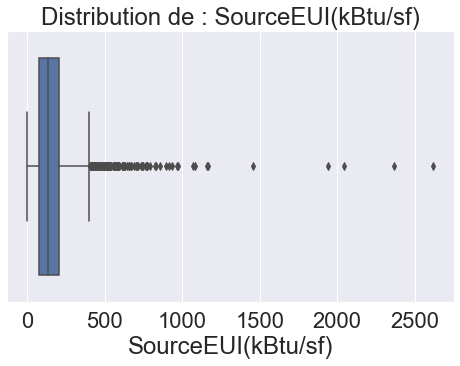

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


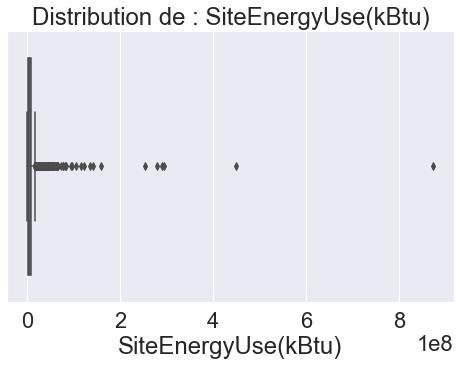

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


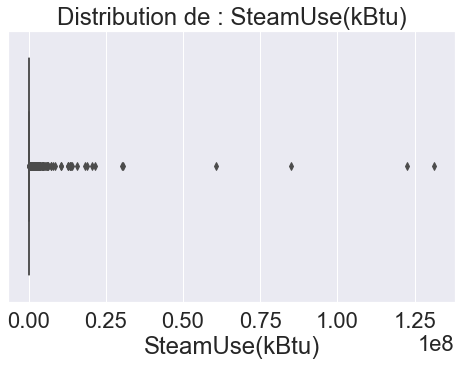

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


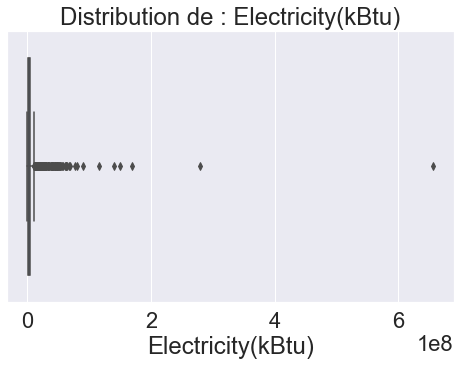

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


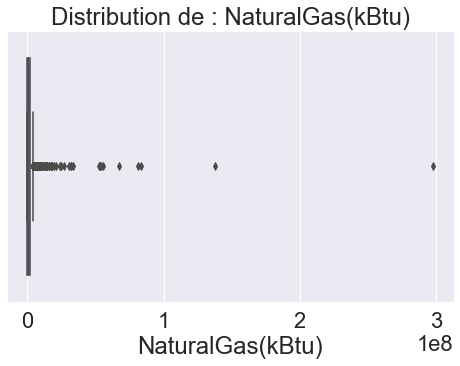

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


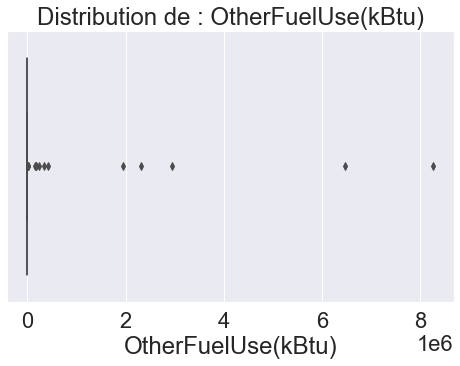

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


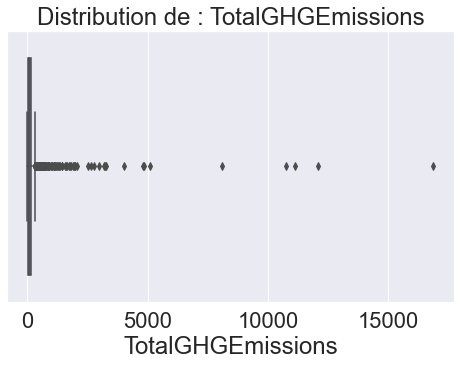

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


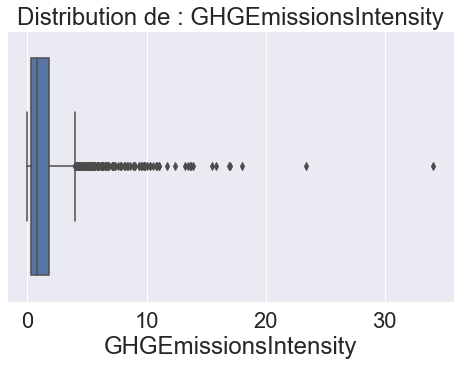

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


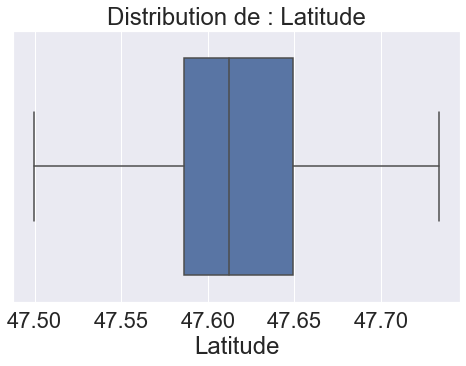

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


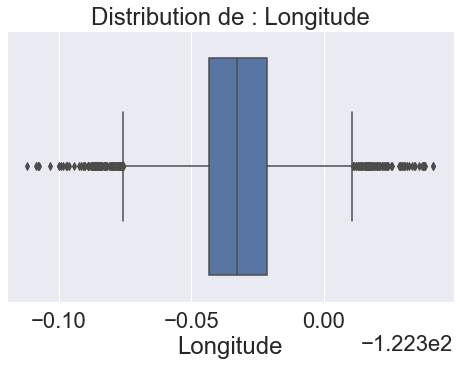

In [43]:
numeric_columns = data.select_dtypes(include = ['float64','int64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (8,5))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

#### - Les valeurs négatives 

En regardant les boites à moustaches, on a trouvé des valeurs négatives pour certaines variables. Donc, on va les supprimer

Pour les variables "PropertyGFABuilding(s)" et "PropertyGFAParking",nous allons donc supprimer les lignes avec les valeurs négatives. 

In [44]:
condition = (data['PropertyGFABuilding(s)'] < 0)
print('Je supprime', len(data.loc[condition]), 'ligne')
data = data.drop(data.loc[condition].index)

condition = (data['PropertyGFAParking'] < 0)
print('Je supprime', len(data.loc[condition]), 'ligne')
data = data.drop(data.loc[condition].index)

Je supprime 1 ligne
Je supprime 1 ligne


Suppression des lignes avec  0 étage, et plus de 76 étages 

In [45]:
condition = (data['NumberofFloors'] == 0)
print('Je supprime', len(data.loc[condition]), 'ligne')
data = data.drop(data.loc[condition].index)

condition = (data['NumberofFloors'] > 76)
print('Je supprime', len(data.loc[condition]), 'ligne')
data = data.drop(data.loc[condition].index)

Je supprime 16 ligne
Je supprime 1 ligne


Pour traiter les autres valeurs aberrantes, on utilise la méthode d'isolation forest

### Isolation forest

In [46]:
from sklearn.ensemble import IsolationForest

On va supprimer les variables déjà traitées. On va enlever ‘ENERGYSTARScore', aussi pour la servir à notre analyse à la fin.

In [47]:
feature_drop= data.drop(['OSEBuildingID','YearBuilt',
                         'NumberofFloors',
                         'Latitude','Longitude',
                         'ENERGYSTARScore',
                         'BuildingType','PrimaryPropertyType','LargestPropertyUseType'], axis=1).dropna()


clf = IsolationForest(random_state= 0).fit(feature_drop)

pd.DataFrame({'ouliers': clf.predict(feature_drop)}, index=feature_drop.index)

data['outliers'] = pd.Series(clf.predict(feature_drop), index=feature_drop.index)

In [48]:
print('Je supprime', len(data.loc[data['outliers'] == -1]), 'outliers')
data = data.drop(data.loc[data['outliers'] == -1].index)
data = data.drop('outliers', axis=1)

Je supprime 107 outliers


C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


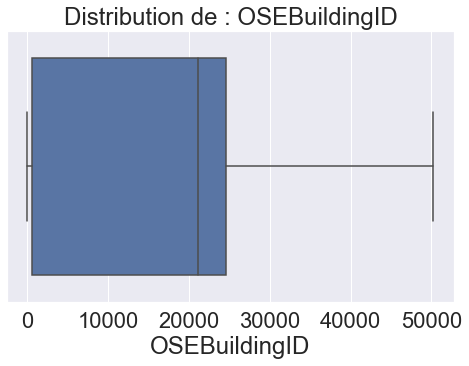

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


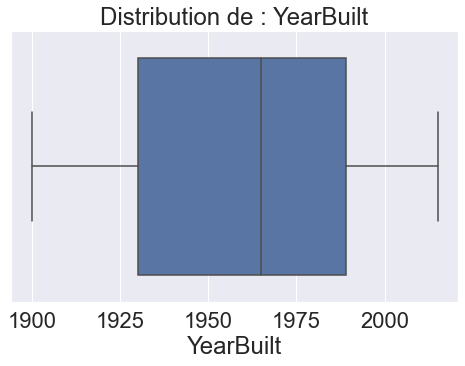

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


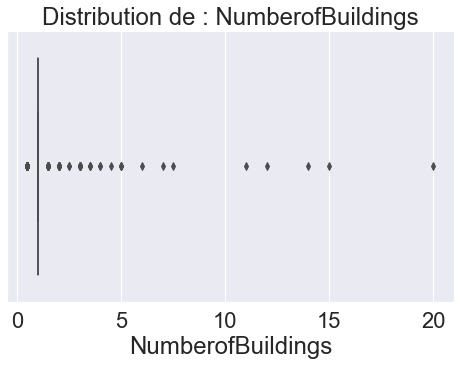

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


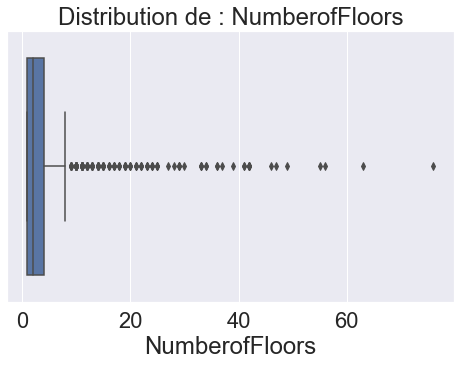

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


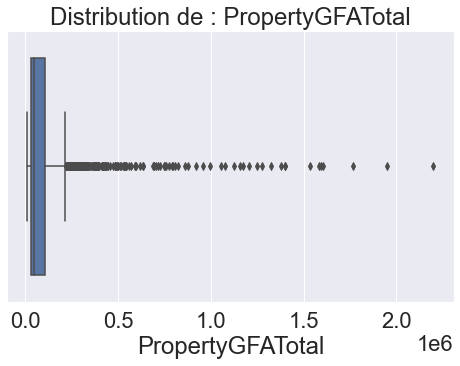

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


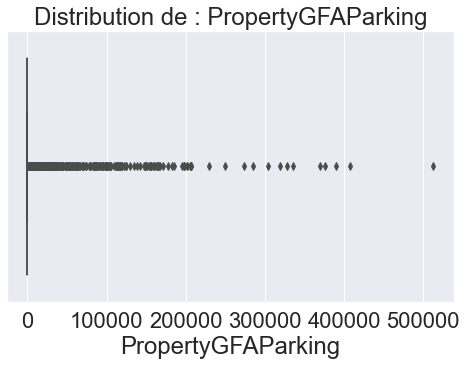

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


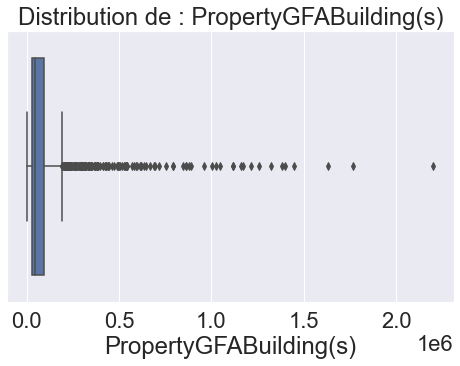

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


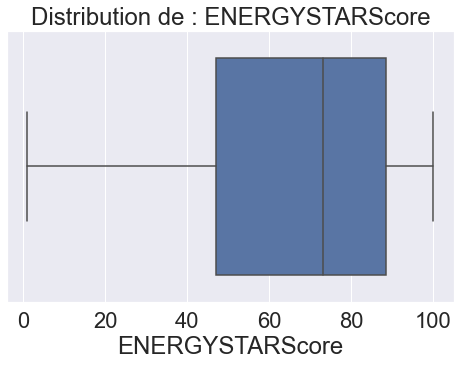

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


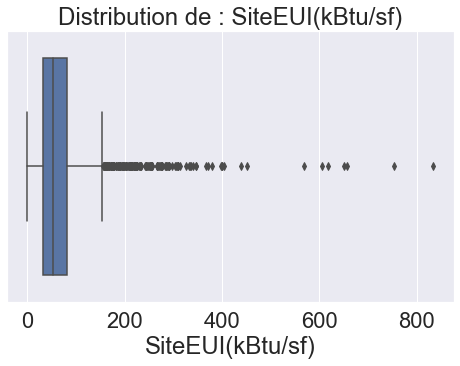

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


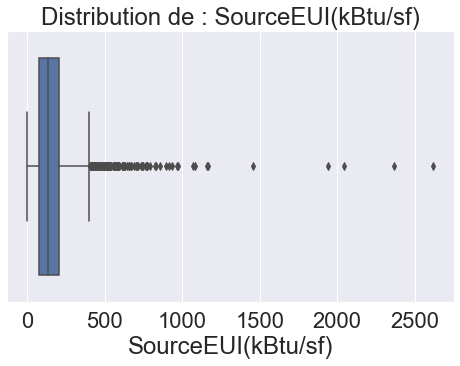

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


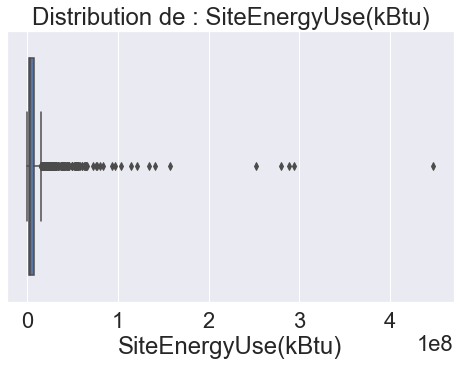

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


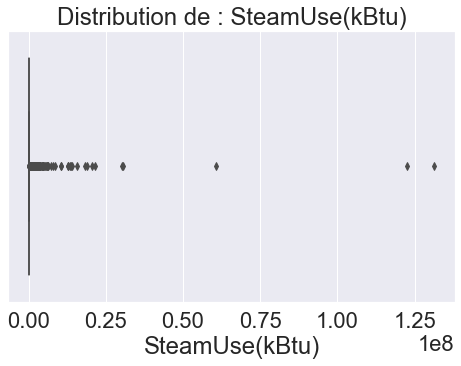

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


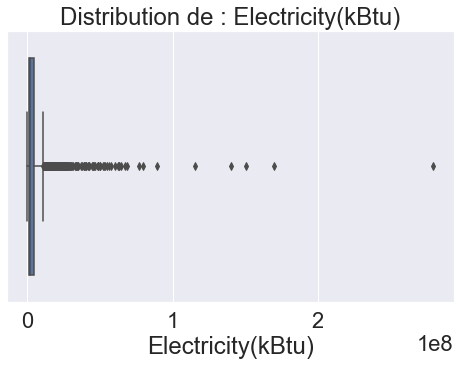

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


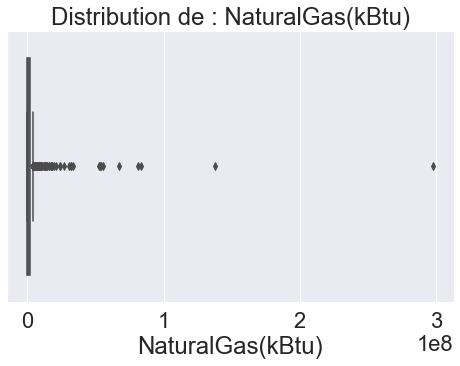

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


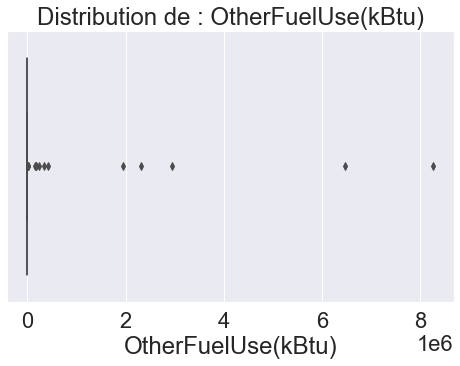

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


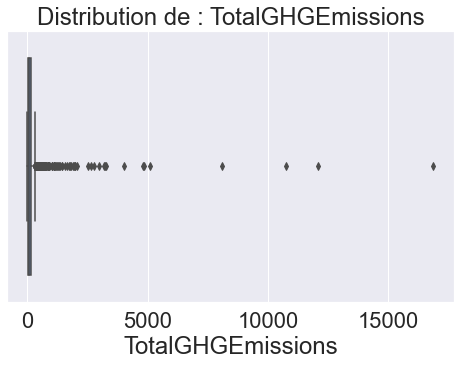

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


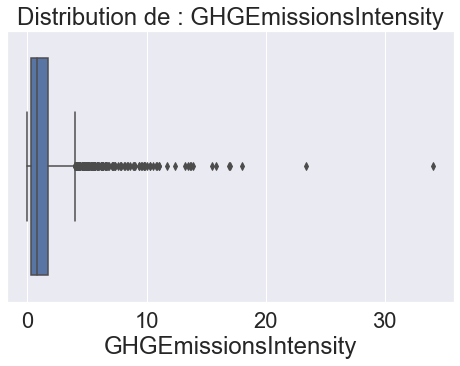

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


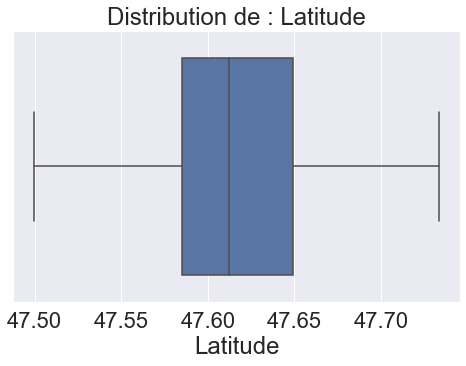

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


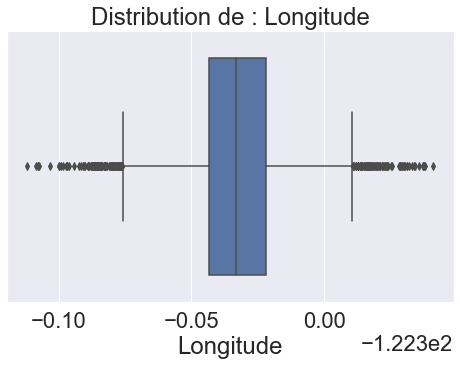

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


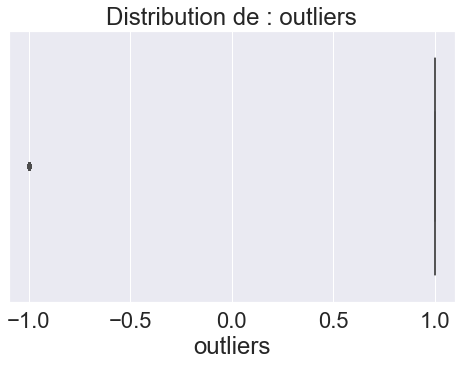

In [48]:
numeric_columns = data.select_dtypes(include = ['float64','int64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (8,5))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

In [49]:
numeric_columns

Index(['OSEBuildingID', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'Latitude', 'Longitude', 'outliers'],
      dtype='object')

### Remplaçons les valeurs NaN de "OtherFuelUse(kBtu)" par la moyenne

In [50]:
data['OtherFuelUse(kBtu)'].fillna((data['OtherFuelUse(kBtu)'].mean()), inplace=True)

### Suppression des lignes avec NaN de "LargestPropertyUseType"

In [51]:
data['LargestPropertyUseType'].isnull().sum()

12

In [52]:
data.loc[pd.isna(data["LargestPropertyUseType"]), :].index

Int64Index([0, 5, 8, 17, 23, 26, 36, 422, 637, 1418, 1437, 1492], dtype='int64')

In [53]:
index_with_nan= data.loc[pd.isna(data["LargestPropertyUseType"]), :].index

In [54]:
data.drop(index_with_nan,0, inplace=True)

In [55]:
data['LargestPropertyUseType'].isnull().sum()

0

In [56]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Latitude', 'Longitude',
       'outliers'],
      dtype='object')

- ### Imputation par KNN sur "ENERGYSTARScore"

In [58]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [59]:
data_train = data.loc[data['ENERGYSTARScore'].notnull(),]
data_test = data.loc[data['ENERGYSTARScore'].isnull(),]

Pour les x_train, je prends les variables énergétiques, sans les variables cibles, car utiliser la Target pour compléter les valeurs manquantes d'une variable puis le reprendre, peut causer la fuite de données.

In [60]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data_train, test_size = 0.3)

x_train = train[['SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)',
       'Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)',
       'GHGEmissionsIntensity']]
           
y_train = train['ENERGYSTARScore']

x_test = test[['SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)',
       'Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)',
       'GHGEmissionsIntensity']]
y_test = test['ENERGYSTARScore']
x_predict = data_test[['SiteEUI(kBtu/sf)',
       'SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)',
       'Electricity(kBtu)','NaturalGas(kBtu)','OtherFuelUse(kBtu)',
       'GHGEmissionsIntensity']]

In [61]:
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train) 
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 37.28416872530024
RMSE value for k=  2 is: 32.45145257447729
RMSE value for k=  3 is: 31.089497566086486
RMSE value for k=  4 is: 30.26114875986803
RMSE value for k=  5 is: 29.4700688158635
RMSE value for k=  6 is: 28.48425283663111
RMSE value for k=  7 is: 28.335692507269677
RMSE value for k=  8 is: 27.93076768785094
RMSE value for k=  9 is: 27.797521168649876
RMSE value for k=  10 is: 27.67342357631266
RMSE value for k=  11 is: 27.634812690628745
RMSE value for k=  12 is: 27.803240213715338
RMSE value for k=  13 is: 27.684445787896948
RMSE value for k=  14 is: 27.81950645507418
RMSE value for k=  15 is: 27.770201638718195
RMSE value for k=  16 is: 27.678664786295048
RMSE value for k=  17 is: 27.61844283005507
RMSE value for k=  18 is: 27.683321891692348
RMSE value for k=  19 is: 27.6672075696202
RMSE value for k=  20 is: 27.583635882078223


<AxesSubplot:>

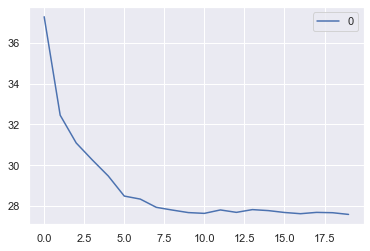

In [62]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [63]:
model = neighbors.KNeighborsRegressor(n_neighbors = 20)

In [64]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [65]:
pred_ENERGYSTARScore = model.predict(x_predict)

In [66]:
data.loc[data['ENERGYSTARScore'].isnull(), 'ENERGYSTARScore'] = pred_ENERGYSTARScore

In [67]:
data['ENERGYSTARScore'].isnull().sum()

0

<AxesSubplot:>

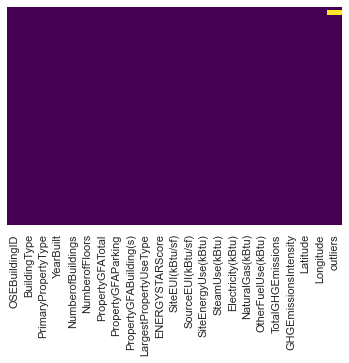

In [68]:
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [67]:
data = data.drop(['SiteEUI(kBtu/sf)',
              'SourceEUI(kBtu/sf)',
              'SteamUse(kBtu)',
              'Electricity(kBtu)',
              'NaturalGas(kBtu)',
              'GHGEmissionsIntensity'
              ], axis=1)

In [68]:
data = data.drop(['OtherFuelUse(kBtu)'], axis = 1)

#### Ajout d'une variable de l'age de bâtiment 

In [69]:
# Obtenir l'année en cours 
import datetime
current_year = datetime.datetime.now().year

# Calculer l'âge du bâtiment et l'enregistrer dans le DataFrame 
data['BuildingAge'] = current_year - data['YearBuilt']

# Suppression de la colonne de 'YearBuilt'
data = data.drop(columns=['YearBuilt'])

In [70]:
data['PropertyGFAParkingbool'] = data['PropertyGFAParking']
data.loc[data['PropertyGFAParking'] != 0, 'PropertyGFAParkingbool'] = 1

In [73]:
data = data.drop(['PropertyGFAParking',
              'PropertyGFATotal'], axis=1)

In [74]:
numeric_columns = data.select_dtypes(include = ['int64','float64']).columns

In [75]:
numeric_columns

Index(['OSEBuildingID', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'Latitude', 'Longitude', 'BuildingAge',
       'PropertyGFAParkingbool'],
      dtype='object')

#### Distribution des variables numeriques

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


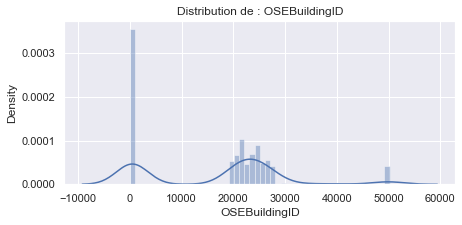

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


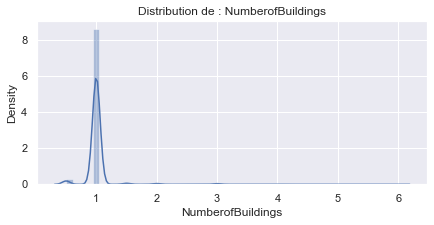

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


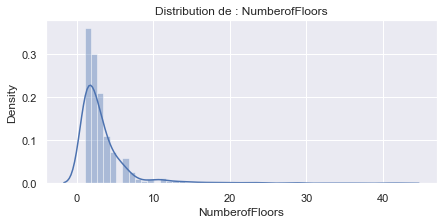

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


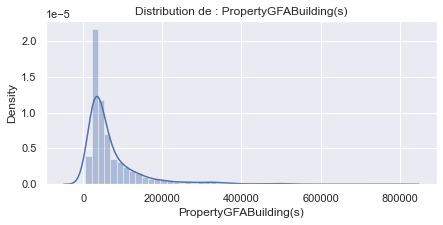

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


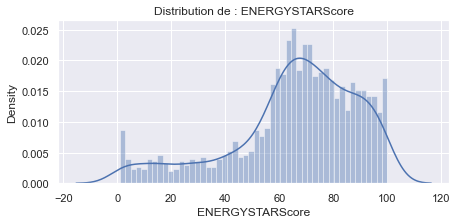

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


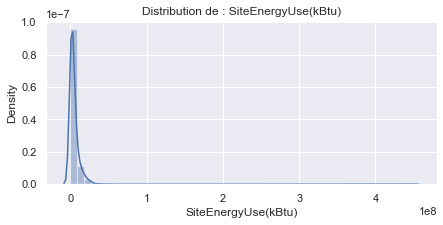

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


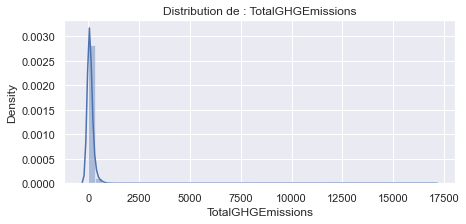

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


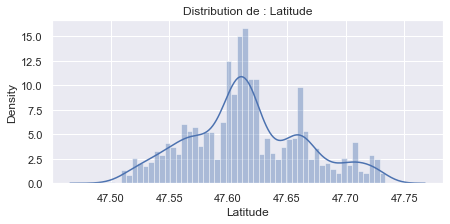

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


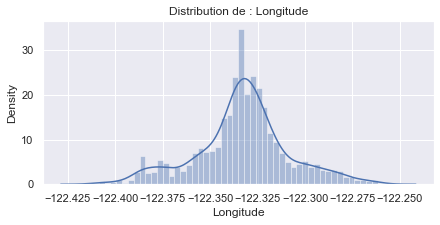

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


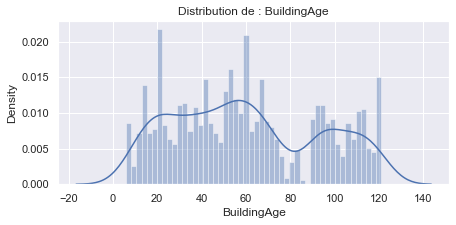

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


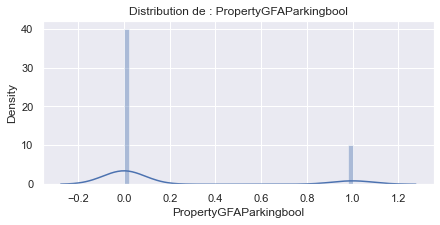

In [76]:
for column in numeric_columns:
    plt.figure(figsize = (7,3))
    sns.set(font_scale=1)
    sns.distplot(data[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

### Transformation logarithmique

On va faire une transformation logarithmique sur les variables cibles

In [77]:
list_log = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']

In [78]:
for col in list_log:
  data[col] = np.log(data[col] + 1)  # +1 pour éviter des valeurs nulles 

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


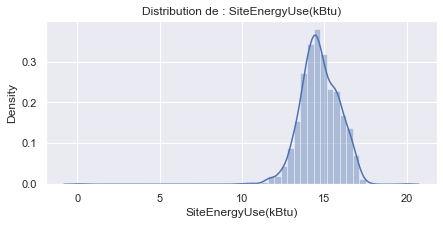

C:\Users\sahel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


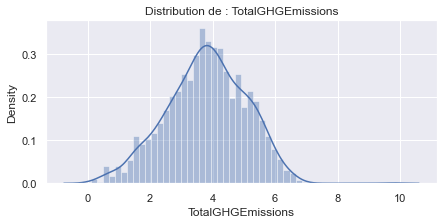

In [79]:
for column in list_log:
    plt.figure(figsize = (7,3))
    sns.set(font_scale=1)
    sns.distplot(data[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

### Les variables categoriques

On va regarder les variables catégoriques

In [80]:
category_columns = data.select_dtypes(include = ['object']).columns

In [81]:
category_columns

Index(['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType'], dtype='object')

#### <span style='color:green'>BuildingType</span>

In [82]:
data['BuildingType'].value_counts().sort_values(ascending=False)

NonResidential        1365
SPS-District K-12       98
Nonresidential COS      80
Campus                  15
Nonresidential WA        1
Name: BuildingType, dtype: int64

- Nonresidential COS, et Nonresidential WA: Those are commercial buildings owned by City of Seattle(COS), and Washington State(WA) building.

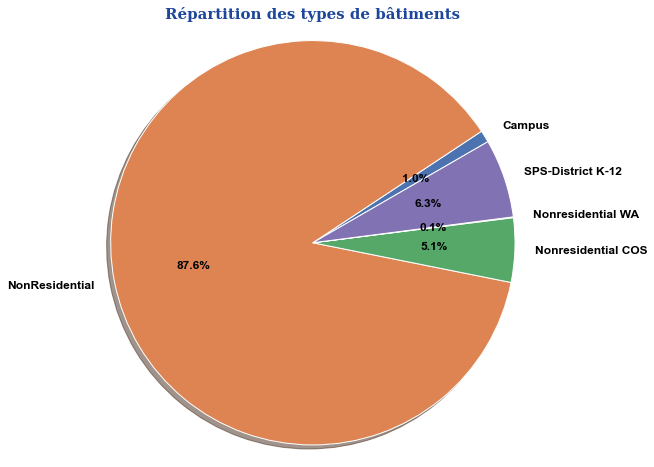

In [83]:
building_type = data.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 15,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments", fontdict=font_title)
plt.show()

On va les regrouper en 4 catégories

In [84]:
Rename = {'NonResidential' : 'NonResidential','Nonresidential COS' : 'NonResidential','Campus':'Campus','SPS-District K-12': 'Education' }

data['BuildingType'] = data['BuildingType'].replace(Rename)

In [85]:
data['BuildingType'].value_counts().sort_values(ascending=False)

NonResidential       1445
Education              98
Campus                 15
Nonresidential WA       1
Name: BuildingType, dtype: int64

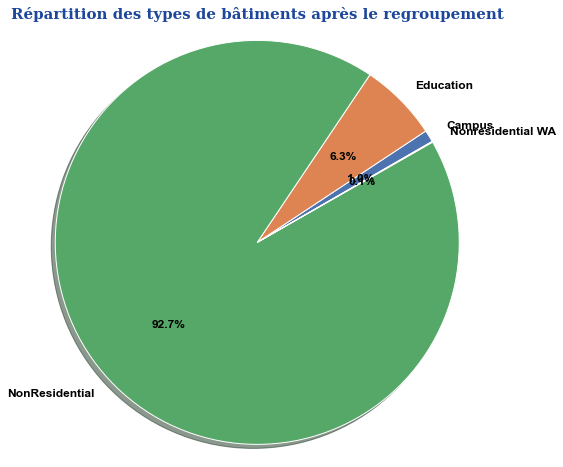

In [86]:
building_type = data.groupby(by='BuildingType')['OSEBuildingID'].nunique()

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 15,
             }

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', shadow=True, startangle=30,
       textprops=dict(color="black",size=12, weight="bold"))
ax.axis('equal')
ax.set_title("Répartition des types de bâtiments après le regroupement", fontdict=font_title)
plt.show()

#### <span style='color:green'>PrimaryPropertyType</span>

In [87]:
data['PrimaryPropertyType'].value_counts().sort_values(ascending=False)

Small- and Mid-Sized Office    291
Other                          228
Non-Refrigerated Warehouse     185
Large Office                   151
K-12 School                    140
Mixed Use Property             101
Retail Store                    92
Worship Facility                70
Hotel                           66
Distribution Center             53
Medical Office                  36
Supermarket / Grocery Store     31
Self-Storage Facility           27
Senior Care Community           17
Residence Hall                  17
College/University              16
Refrigerated Warehouse          12
Restaurant                       8
Laboratory                       4
Low-Rise Multifamily             3
Office                           3
University                       3
Warehouse                        3
Hospital                         1
Restaurant\n                     1
Name: PrimaryPropertyType, dtype: int64

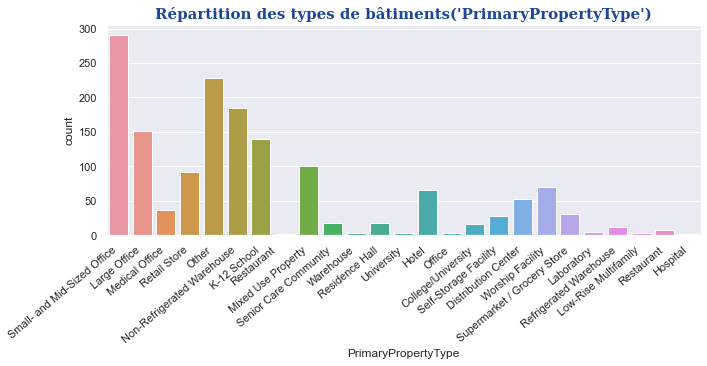

In [88]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=data, x='PrimaryPropertyType')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title("Répartition des types de bâtiments('PrimaryPropertyType')", fontdict=font_title)

plt.show()

#### On va les regrouper selon la classification de l'Agence de Protection de l'Environnement 
#### (Environmental Protection Agency (EPA)


In [89]:
Rename = {'Retail Store' : 'Retail',
                'Supermarket / Grocery Store' : 'Food Sales & Service',
          
                'Restaurant': 'Food Sales & Service',
                'Restaurant\n': 'Food Sales & Service',
          
                'Small- and Mid-Sized Office': 'Office',
                'Large Office': 'Office',  
          
                'Residence Hall': 'Lodging/Residential',
                'Hotel': 'Lodging/Residential',
          
                'Senior Care Community' : 'Healthcare',
                'Hospital': 'Healthcare',
                'Medical Office' : 'Healthcare',
          
                'K-12 School' : 'Education',
                'SPS-District K-12': 'Education',
                'University': 'Education',
                'College/University': 'Education',
                'Laboratory': 'Technology/Science',
          
                'Distribution Center': 'Warehouse/Storage',
                'Self-Storage Facility': 'Warehouse/Storage',
                'Non-Refrigerated Warehouse': 'Warehouse/Storage',
                'Refrigerated Warehouse': 'Warehouse/Storage',
          
                'Worship Facility': 'Public Assembly',
          
                'Low-Rise Multifamily': 'Lodging/Residential',
                'Mixed Use Property': 'Mixed Use'
             
               }

data['PrimaryPropertyType'] = data['PrimaryPropertyType'].replace(Rename)

In [90]:
data['PrimaryPropertyType'].value_counts().sort_values(ascending=False)

Office                  445
Warehouse/Storage       277
Other                   228
Education               159
Mixed Use               101
Retail                   92
Lodging/Residential      86
Public Assembly          70
Healthcare               54
Food Sales & Service     40
Technology/Science        4
Warehouse                 3
Name: PrimaryPropertyType, dtype: int64

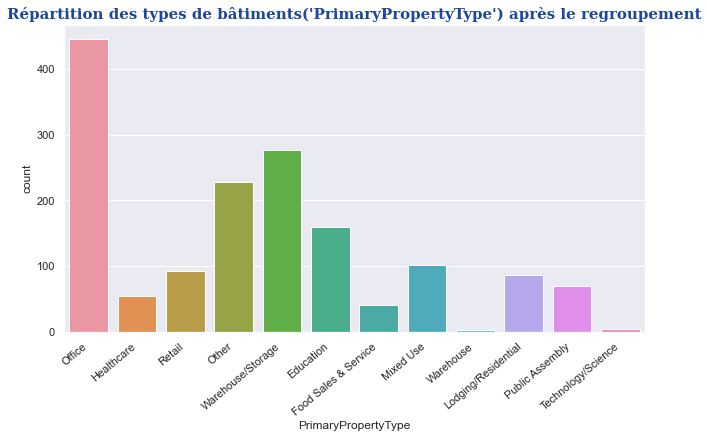

In [91]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data=data, x='PrimaryPropertyType')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title("Répartition des types de bâtiments('PrimaryPropertyType') après le regroupement", fontdict=font_title)

plt.show()

#### <span style='color:green'>LargestPropertyUseType</span>

In [92]:
data['LargestPropertyUseType'].value_counts().sort_values(ascending=False)

Office                                                  479
Non-Refrigerated Warehouse                              198
K-12 School                                             140
Retail Store                                            101
Other                                                    88
Worship Facility                                         70
Hotel                                                    67
Distribution Center                                      54
Medical Office                                           38
Supermarket/Grocery Store                                33
Other - Recreation                                       28
Self-Storage Facility                                    27
Parking                                                  23
College/University                                       18
Residence Hall/Dormitory                                 18
Senior Care Community                                    17
Other - Entertainment/Public Assembly   

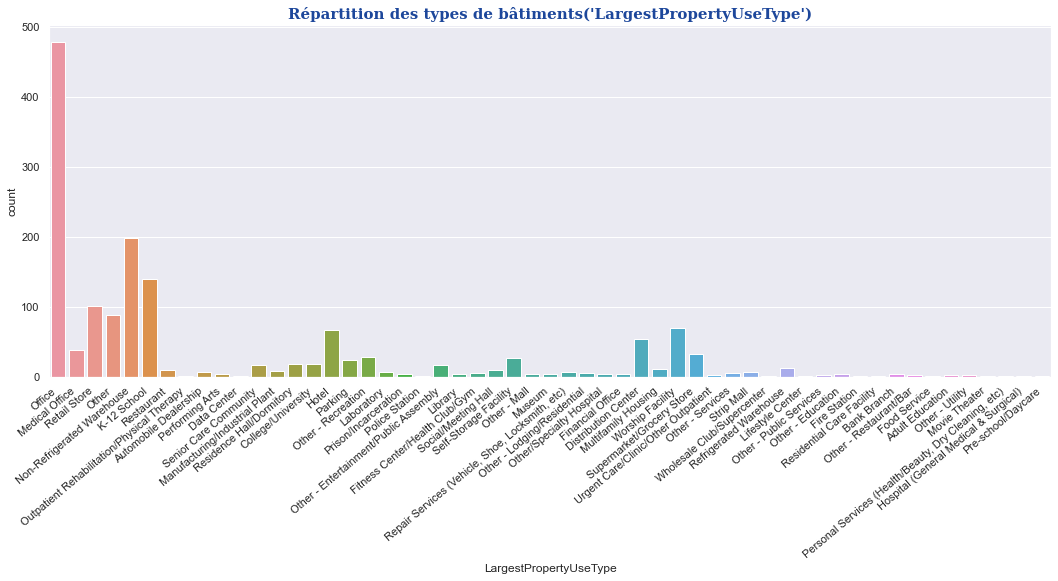

In [93]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=data, x='LargestPropertyUseType')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title("Répartition des types de bâtiments('LargestPropertyUseType')", fontdict=font_title)

plt.show()

On va les regrouper

In [94]:
LargestProperty = {'Retail Store' : 'Retail',
                   'Enclosed Mall': 'Retail',
                   'Automobile Dealership': 'Retail',
                   'Strip Mall': 'Retail',
                   'Other - Mall': 'Retail',
                   
                   'Convenience Store without Gas Station': 'Food Sales & Service',
                   'Wholesale Club/Supercenter': 'Food Sales & Service',
                   'Supermarket/Grocery Store' : 'Food Sales & Service',
                   'Food Sales': 'Food Sales & Service',
                   'Food Service': 'Food Sales & Service',
                   'Other - Restaurant/Bar' : 'Food Sales & Service',
                   'Fast Food Restaurant': 'Food Sales & Service',
                   'Restaurant': 'Food Sales & Service',
                   'Bar/Nightclub': 'Food Sales & Service',
                   
                   'Non-Refrigerated Warehouse': 'Warehouse/Storage',
                   'Refrigerated Warehouse': 'Warehouse/Storage',
                   'Distribution Center': 'Warehouse/Storage',
                   'Self-Storage Facility': 'Warehouse/Storage',
                   
                   'Other - Services' : 'Services',
                   'Other - Public Services': 'Services',
                   'Parking': 'Services',
                   'Repair Services (Vehicle, Shoe, Locksmith, etc)' : 'Services',
                   'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Services',
                  
                   'Police Station': 'Public Services',
                   'Fire Station': 'Public Services',
                   'Courthouse': 'Public Services',
                   'Library': 'Public Services',
                   'Other - Utility': 'Public Services',
                   
                   'Prison/Incarceration': 'Lodging/Residential',
                   'Multifamily Housing':'Lodging/Residential',
                   'Other - Lodging/Residential': 'Lodging/Residential',
                   'Residence Hall/Dormitory': 'Lodging/Residential',
                   'Hotel': 'Lodging/Residential',
                 
                   'Worship Facility': 'Public Assembly',
                   'Other - Recreation': 'Public Assembly',
                   'Other - Entertainment/Public Assembly': 'Public Assembly',
                   'Performing Arts': 'Public Assembly',
                   'Movie Theater': 'Public Assembly',
                   'Museum': 'Public Assembly',
                   'Social/Meeting Hall':'Public Assembly',
                   'Fitness Center/Health Club/Gym': 'Public Assembly',
                   'Convention Center': 'Public Assembly',
                   'Lifestyle Center': 'Public Assembly',
                   
                   'Senior Care Community' : 'Healthcare',
                   'Residential Care Facility' : 'Healthcare',
                   'Outpatient Rehabilitation/Physical Therapy' : 'Healthcare',
                   'Medical Office' : 'Healthcare',
                   'Urgent Care/Clinic/Other Outpatient' : 'Healthcare',
                   'Other/Specialty Hospital' : 'Healthcare',
                   'Hospital (General Medical & Surgical)' :'Healthcare',
                   
                   'Laboratory': 'Technology/Science',
                   'Data Center': 'Technology/Science',

                   'Bank Branch' : 'Financial Office',
                   'Financial Office' : 'Financial Office',

                   'K-12 School' : 'Education',
                   'Other - Education': 'Education',
                   'Vocational School' : 'Education', 
                   'Adult Education' : 'Education',
                   'Pre-school/Daycare': 'Education',
                   'University': 'Education',
                   'College/University': 'Education'}

data['LargestPropertyUseType'] = data['LargestPropertyUseType'].replace(LargestProperty )

In [95]:
data['LargestPropertyUseType'].value_counts().sort_values(ascending=False)

Office                            479
Warehouse/Storage                 291
Education                         164
Public Assembly                   139
Retail                            116
Lodging/Residential               104
Other                              88
Healthcare                         64
Food Sales & Service               46
Services                           37
Financial Office                    8
Public Services                     8
Manufacturing/Industrial Plant      8
Technology/Science                  7
Name: LargestPropertyUseType, dtype: int64

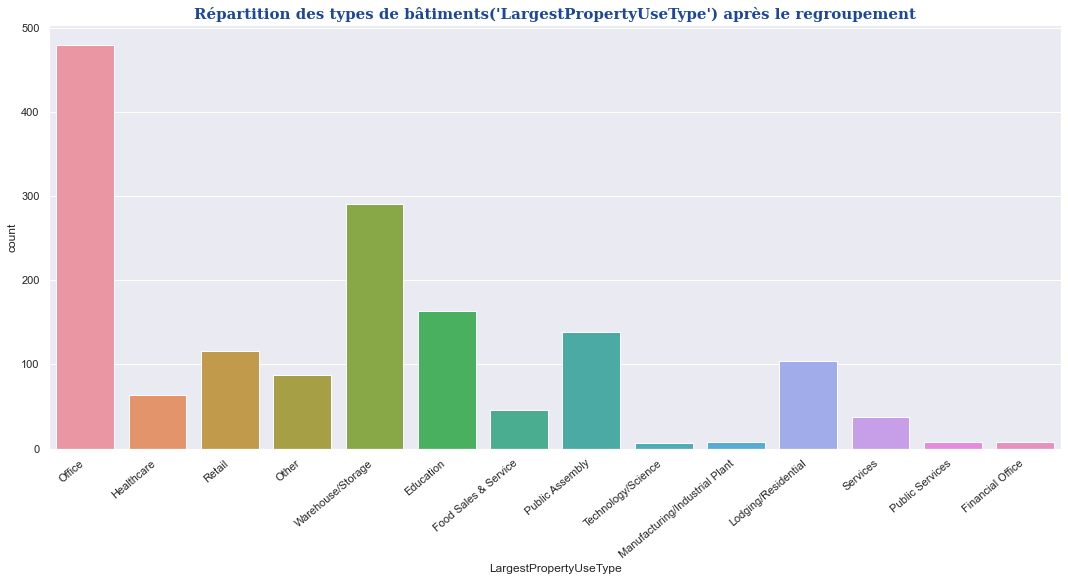

In [96]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=data, x='LargestPropertyUseType')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title("Répartition des types de bâtiments('LargestPropertyUseType') après le regroupement", fontdict=font_title)

plt.show()


#### <span style='color:blue'>Corrélation entre les variables</span>

### Matrice de corrélation

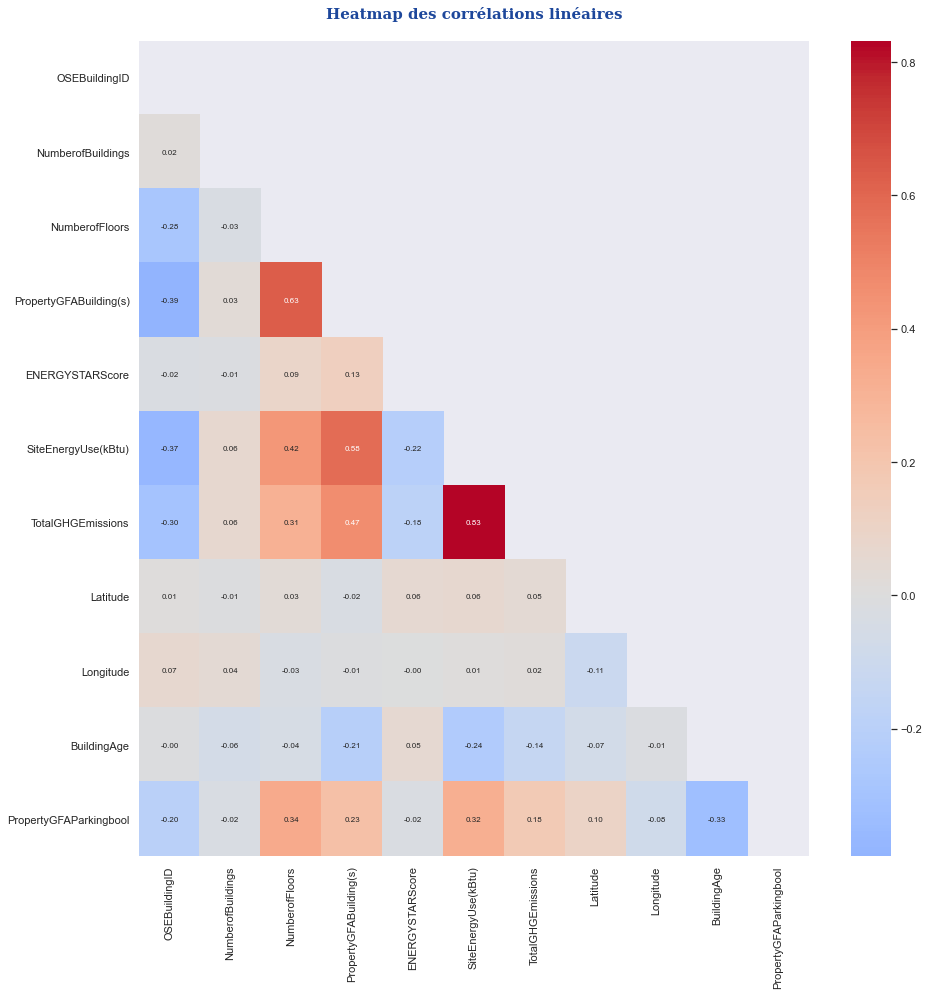

In [97]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

In [99]:
data.corr()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,BuildingAge,PropertyGFAParkingbool
OSEBuildingID,1.000000,0.015149,-0.277590,-0.391145,-0.021443,-0.368236,-0.299950,0.011730,0.065648,-0.004278,-0.198696
NumberofBuildings,0.015149,1.000000,-0.029778,0.032955,-0.013798,0.060641,0.062939,-0.005707,0.044671,-0.058922,-0.023964
NumberofFloors,-0.277590,-0.029778,1.000000,0.629600,0.088708,0.422282,0.311097,0.033201,-0.032438,-0.040405,0.341013
PropertyGFABuilding(s),-0.391145,0.032955,0.629600,1.000000,0.132527,0.582817,0.467337,-0.024844,-0.008644,-0.209735,0.228793
ENERGYSTARScore,-0.021443,-0.013798,0.088708,0.132527,1.000000,-0.217711,-0.184471,0.055224,-0.004067,0.053890,-0.020402
SiteEnergyUse(kBtu),-0.368236,0.060641,0.422282,0.582817,-0.217711,1.000000,0.832150,0.059960,0.013856,-0.242629,0.319412
TotalGHGEmissions,-0.299950,0.062939,0.311097,0.467337,-0.184471,0.832150,1.000000,0.046833,0.016640,-0.141516,0.175118
Latitude,0.011730,-0.005707,0.033201,-0.024844,0.055224,0.059960,0.046833,1.000000,-0.109407,-0.066780,0.099472
Longitude,0.065648,0.044671,-0.032438,-0.008644,-0.004067,0.013856,0.016640,-0.109407,1.000000,-0.013680,-0.076327
BuildingAge,-0.004278,-0.058922,-0.040405,-0.209735,0.053890,-0.242629,-0.141516,-0.066780,-0.013680,1.000000,-0.326282



Points Majeurs :
#### Consommation d'energy : Corrélation importante avec:
- PropertyGFATotal,
- PropertyGFABuilding,
- LargestPropertyUseTypeFGA
#### Emissions CO2 : Mêmes corrélations (dans Moindre mesure) + corrélation importante avec la consommation
#### Autres points notables :
- Corrélation importante entre
- PropertyGFATotal et PropertyGFABuildings
- PropertyFGATotal et LargestPropertyUseTypeGFA
- LargestPropertyUseTypeGFA et PropertyFGABuilding(s)
#### Energy Star Score : pas de corrélation notable


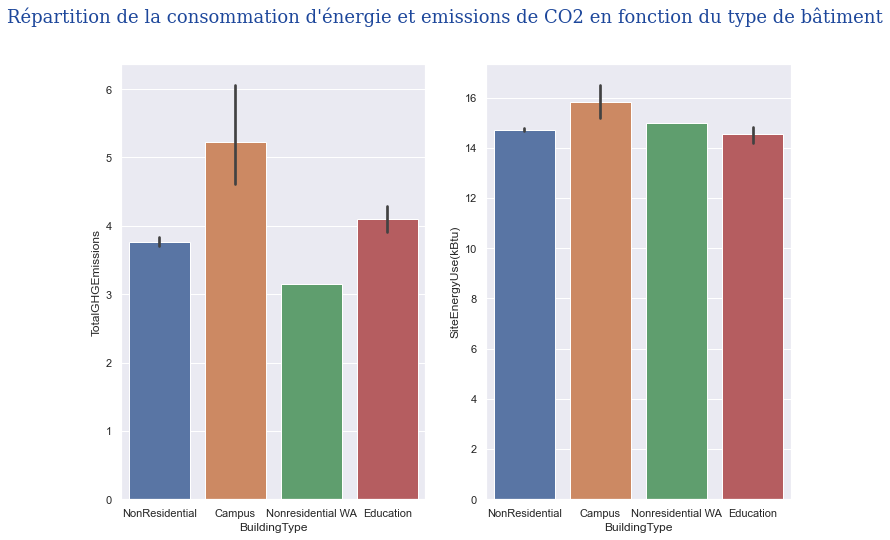

In [100]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(12,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", 
             fontdict=font_title, fontsize=18)
plt.show()

Les bâtiments non résidentiels se positionne après les campus et les bâtiments éducatif       

In [101]:
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data = data, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"Emission de CO2 par surface totale au sol et par type de bâtiment\n", 
          fontdict=font_title, fontsize=16)
plt.show()

ValueError: Could not interpret value `PropertyGFATotal` for parameter `x`

<Figure size 720x432 with 0 Axes>

### <span style='color:blue '> Export du fichier nettoyé </span>

In [102]:
data.to_csv('data_cleaned.csv', index=False)

In [103]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'Latitude', 'Longitude', 'BuildingAge',
       'PropertyGFAParkingbool'],
      dtype='object')